# Project Introduction

Nama Kelompok:
1. Christian Lamhot Tua
2. Pedro Putrananda Lende

***Projects Overview***

*Final Project 3* ini berisikan tentang penerapan materi *Supervised Machine Learning* yaitu dengan motode  *Classification*. Terdapat beberapa algoritma dalam metode classification yang digunakan pada project kali ini, diantaranya Logistic Regression, K-Nearest Neighbors, Support Vector Machine (SVM), Decision Tree, dan Naive Bayes. Tujuan dilaksanakannnya proyek ini yaitu adalah ensemble atau mencari model prediksi klasifikasi terbaik dari beberapa algoritma diatas yang digunakan di dalam prediksi. Data yang digunakan dalam *project* ini adalah data dokumentasi kondisi pasien penderita penyakit Kardiovaskular. Dataset ini terdiri dari 299 baris dan 13 kolom yang dapat diakses [di sini](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). Kolom `DEATH_EVENT` akan menjadi variabel dependent atau target untuk prediksi ini. Jadi, pada proyek kali ini kita akan memprediksi apakah seorang pasien tersebut diperkirakan akan menerima risiko kematian akibat gagal jantung/penyakit Kardiovaskular atau tidak berdasarkan pada fitur yang ada pada dataset.


***About Dataset***

Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 secara global, yang diperkirakan telah merenggut 17,9 juta jiwa setiap tahun, serta menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD dan pada dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, aktivitas fisik dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi. Orang dengan penyakit kardiovaskular atau yang berisiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidaemia atau penyakit yang sudah mapan) memerlukan deteksi dini dan manajemen di mana model pembelajaran mesin dapat sangat membantu.


***Attribute Information:***
1. `age` - umur pasien
2. `anaemia` - apakah ada pengurangan haemoglobin
3. `creatinine_phosphokinase` - level enzim CPK dalam mcg/L
4. `diabetes` - apakah pasien punya riwayat diabetes
5. `ejection_fraction` - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. `high_blood_pressure` - apakah pasien punya darah tinggi
7. `platelets` - jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` - level serum creatinine di darah dalam mg/dL
9. `serum_sodium` - level serum sodium di darah dalam mEq/L
10. `sex` - apakah pasien pria atau wanita
11. `smoking` - apakah pasien merokok
12. `time` - waktu dalam hari untuk follow-up
13. `DEATH_EVENT` - apakah pasien sudah meninggal saat waktu follow-up

***Sumber***  
https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25597242-final-project-3-ensemble
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

# Import Pustaka yang dibutuhkan

In [1]:
# Library Mengolah Data
import pandas as pd
import numpy as np

# Library Visualisasi data
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

# Supaya pesan warning tidak muncul,maka diignore
import warnings
warnings.filterwarnings("ignore")

# Data Loading

## Read Dataset

<b> Untuk read file dataset:</b>

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

<b>Untuk melihat 5 data teratas dari dataset:</b>

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<b>Untuk melihat 5 data terakhir dari dataset:</b>

In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


<b> Untuk mengetahui dimensi dari dataset seperti informasi tentang jumlah baris dan kolom:</b>

In [5]:
print(df.shape)

(299, 13)


Berdasarkan output diatas dapat kita ketahui bahwa dimensi dari data yaitu terdiri atas 299 baris dan 13 kolom

<b>Untuk mendapatkan informasi tentang seluruh nama kolom,jumlah data yang kosong ditiap kolom serta tipe data pada masing-masing kolom dataset:</b>

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


Berdasarkan output dapat kita ketahui bahwa terdapat 3 kolom dengan tipe data *float* dan 10 kolom dengan tipe data *integer*.

# Data Cleaning

Data cleaning bertujuan untuk melihat apakah terdapat nilai yang hilang atau *missing values* pada dataset, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data sebelum kita lakukan eksplorasi data. Dan jika ditemukan hal-hal tersebut maka diperlukan langkah lebih lanjut. 

## Melakukan Pengecekan Missing Values pada dataset berupa nilai NaN/null:

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

0

Berdasarkan *outuput* diatas dapat kita ketahui bahwa tidak terdapat missing value maupun duplikasi data di dalam keseluruhan dataset.

In [9]:
# Mengganti nama kolom yang typo/salah ketik
df.rename(columns= {"anaemia":"anemia"}, inplace = True)

# Eksplorasi Data

Eksplorasi data dilakukan untuk mengetahui data lebih dalam yaitu dengan mencari tahu variabel (fitur) apa yang berpengaruh terhadap variabel target, selain itu juga untuk memeriksa statistika deskriptif dan mengetahui distribusi data yang nantinya sangat berpengaruh dalam prediksi model.

## Korelasi antar fitur/kolom

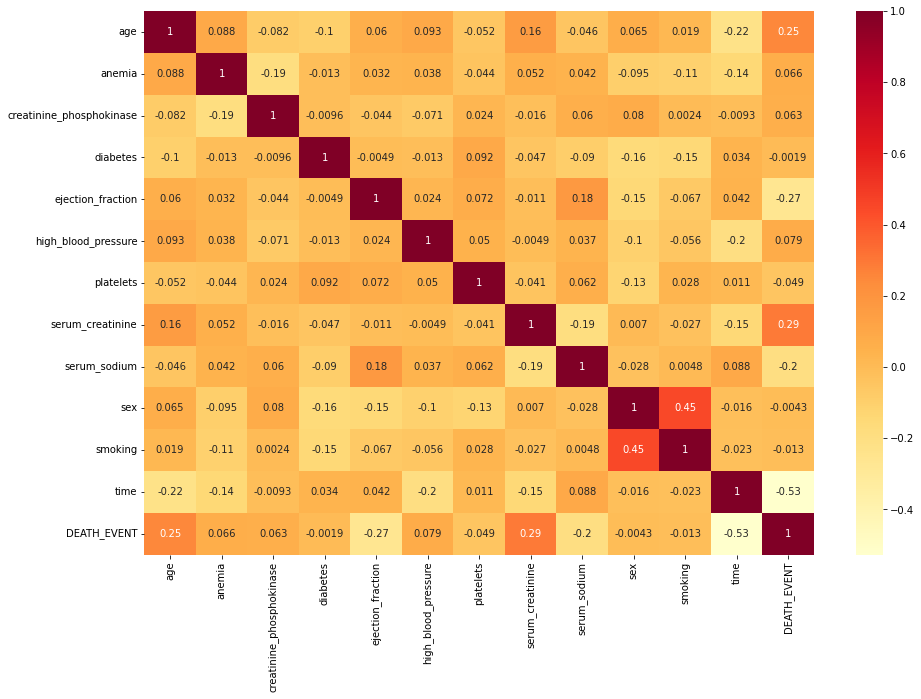

In [10]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="YlOrRd")

Berdasarkan plot heatmap dapat kita ketahui bahwa:
1. variabel independent (fitur) `creatinine_phosphokinase`, dan `platelets`tidak memiliki korelasi yang signifikan dengan kolom target (`DEATH_EVENT`) karena memiliki korelasi kurang dari 0,2 sehingga tidak perlu kita gunakan
2. Variabel `anemia`, `diabetes`, `high_blood_pressure`,  `sex`, dan `smoking` walapun memiliki nilai koefisien korelasi yang kecil tidak perlu kita drop karena merupakan kolom kategorik.
2. Berdasarkan plot heatmap dapat kita ketahui bahwa kolom `age` berkorelasi positif walaupun cendrung rendah (0.25), yang berarti semakin tua umur seorang pasien, maka resiko kematian akibat penyakit jantung juga semakin tinggi.
3. Berdasarkan plot heatmap kolom `ejection_fraction` dan `serum_sodium` memiliki koefisien korelasi rendah negatif (-0.27 dan -0.2), dimana berarti semakin rendah presentase darah yang keluar dari jantung maka semakin tinggi resiko kematian akibat penyakit jantung. Begitu pula semakin rendah level serum sodium maka resiko kematian akibat penyakit jantung juga semakin tinggi.
4. Berdasarkan plot heatmap dapat kita ketahui bahwa kolom `serum_creatinne` memiliki koefisien korelasi positif dengan koefisien korelasi yang cukup rendah (0.29), dimana yang berarti semakin tinggi nilai level serum creatinne dalam tubuh pasien, maka resiko kematian akibat penyakit jantung juga semakin tinggi. 
5. Berdasarkan plot heatmap dapat kita ketahui bahwa kolom `time` berkorelasi negatif dengan kolom target dengan koefisien korelasi yang cukup besar (-0.53), dimana berarti semakin sering dilakukan *follow-up* kondisi pasien (dalam hari) maka resiko kematian akibat penyakit jantung semakin kecil.

In [11]:
# menghapus data creatinine_phosphokinase dan platelets yang tidak memiliki korekasi signifikan dengan kolom target
df= df.drop(['creatinine_phosphokinase','platelets'], axis=1)
df

,age,anemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,20,1,1.9,130,1,0,4,1
1,55.0,0,0,38,0,1.1,136,1,0,6,1
2,65.0,0,0,20,0,1.3,129,1,1,7,1
3,50.0,1,0,20,0,1.9,137,1,0,7,1
4,65.0,1,1,20,0,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,1.1,143,1,1,270,0
295,55.0,0,0,38,0,1.2,139,0,0,271,0
296,45.0,0,1,60,0,0.8,138,0,0,278,0
297,45.0,0,0,38,0,1.4,140,1,1,280,0


## Statistik deskriptif dan distribusi masing-masing fitur/kolom

Melihat beberapa rincian statistik masing-masing fitur/kolom.

In [12]:
df.describe()

,age,anemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,0.418060,38.083612,0.351171,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,0.494067,11.834841,0.478136,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,0.000000,14.000000,0.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,0.000000,30.000000,0.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,0.000000,38.000000,0.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,1.000000,45.000000,1.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1.000000,80.000000,1.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Memeriksa distribusi data menggunakan Histogram.

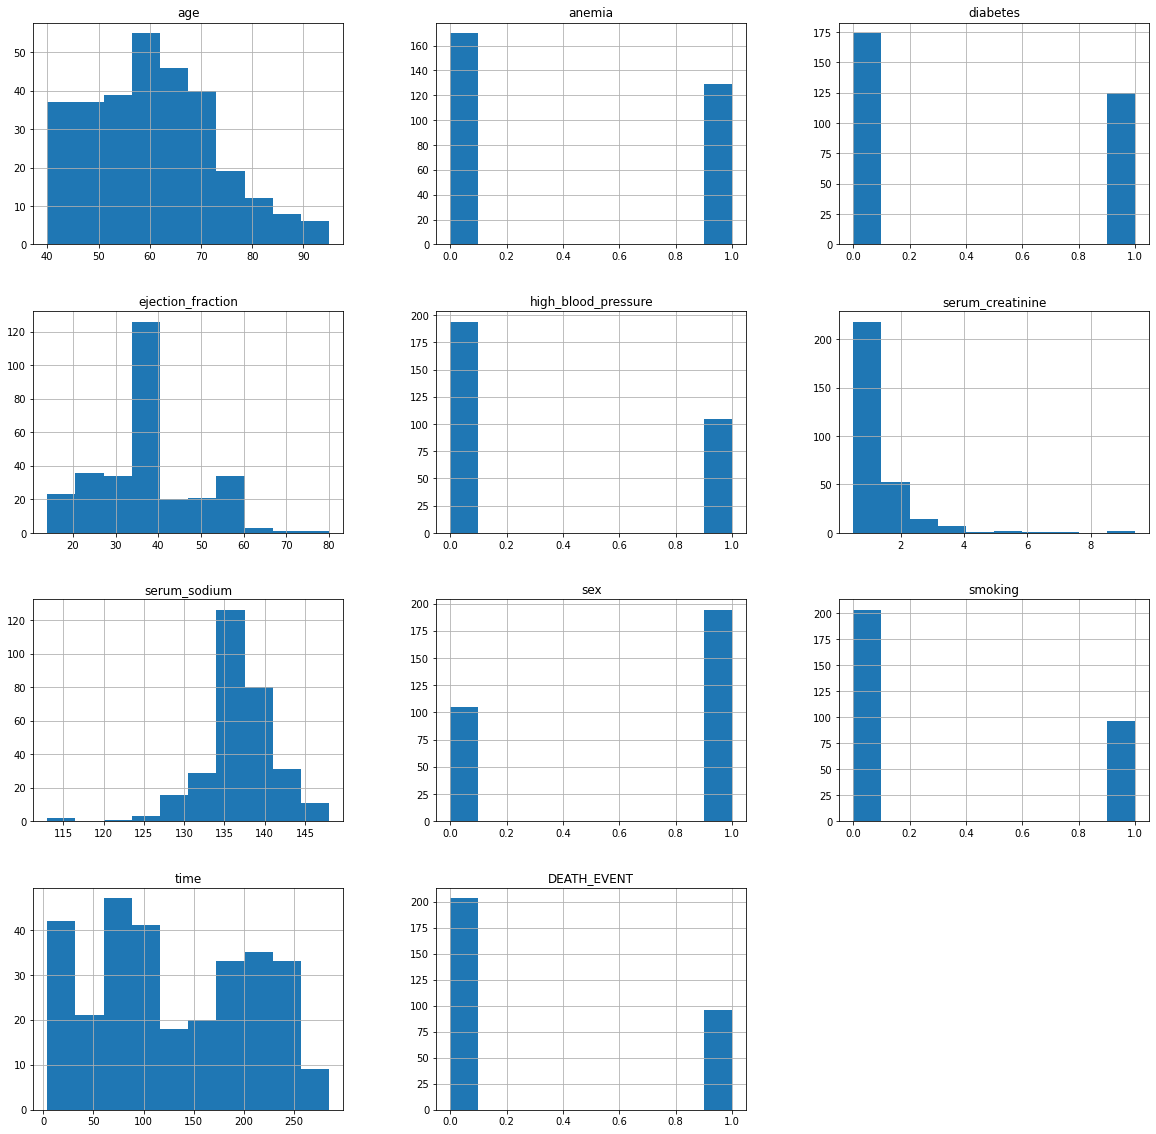

In [13]:
df.hist(figsize=(20, 20))
plt.show()

Berdasarkan plot histogram diatas dapat kita lihat secara visual bahwa hampir setiap fitur pada dataset tidak berdistribusi secara normal. Dan berdasarkan plot juga dapat kita ketahui bahwa umur pasien yang tercatat dalam data yang memiliki frekuensi tertinggi yaitu sekitar umur 55 - 65 tahun.

#### Menghitung kecondongan set data, yang menggambarkan simetri set data tersebut terhadap rata-ratanya.

In [14]:
df.skew()

age                    0.423062
anemia                 0.278261
diabetes               0.333929
ejection_fraction      0.555383
high_blood_pressure    0.626732
serum_creatinine       4.455996
serum_sodium          -1.048136
sex                   -0.626732
smoking                0.770349
time                   0.127803
DEATH_EVENT            0.770349
dtype: float64

Berdasarkan output diatas dapat kita lihat bahwa kolom *creatinine_phosphokinase* dan *serum_creatinine* mempunya nilai *skewness* tertinggi yang berarti kedua kolom tersebut memiliki nilai modus dan median yang lebih rendah dibanding nilai rata-ratanya. Sedangkan kolom *serum_sodium* dan *sex* memiliki nilai kemiringan atau *skewness* negatif, yang artinya nilai modus dan median lebih tinggi dibanding nilai rata-ratanya.

<b> Data dikatakan bernilai normal ketika nilai rasio skewness berada pada rentang nilai -2 sampai 2.Kolom serum_creatinine memiliki nilai 4.455996 pada hasil uji skewness sehingga dapat kita hapus karena data tersebut tidak bernilai normal

In [15]:
# menghapus data serum_creatinine karena bernilai > 2
df= df.drop(['serum_creatinine'], axis=1)
df

,age,anemia,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,20,1,130,1,0,4,1
1,55.0,0,0,38,0,136,1,0,6,1
2,65.0,0,0,20,0,129,1,1,7,1
3,50.0,1,0,20,0,137,1,0,7,1
4,65.0,1,1,20,0,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,143,1,1,270,0
295,55.0,0,0,38,0,139,0,0,271,0
296,45.0,0,1,60,0,138,0,0,278,0
297,45.0,0,0,38,0,140,1,1,280,0


## Uji normalitas data

Selanjutnya akan diperiksa apakah data numerik berdistribusi dengan normal atau tidak.

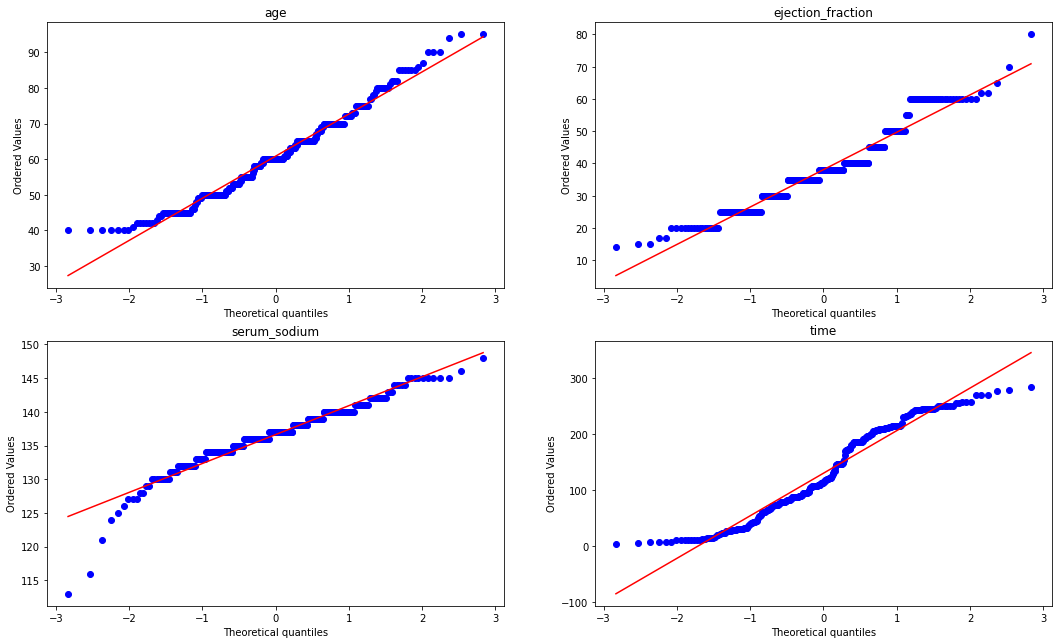

In [16]:
# Variable names
columns = ["age", "ejection_fraction", "serum_sodium", "time"]

# Create the plot
plt.figure(figsize=(18, 40))

for i in range(1, 5):
    plt.subplot(7, 2, i)
    stats.probplot(df[columns[i-1]], dist="norm", plot=plt)
    plt.title(columns[i-1])

Berdasarkan plot, secara visualisasi dapat dapat kita ketahui bahwa kolom kolom numerik seperti `age`, `ejection_fraction`, `serum_sodium`, dan `time` mempunyai titk yang menyabar diantara garis  normal, sehingga dapat kita simpulkan bahwa kolom tersebut mempunya data yang bersebar seara normal walau terdapat beberapa outlier

## Jumlah masing-masing nilai unik pada kolom target

Melihat nilai unik pada variabel `target`.

In [17]:
df["DEATH_EVENT"].unique()

array([1, 0], dtype=int64)

Diketahui:terdapat 2 nilai unik pada variabel target yaitu 1 untuk jumlah orang yang memliki risiko kematian akibat penyakit jantung dan 0 merupakan jumlah orang yang tidak memiliki risiko kematian akibat penyakit jantung.

Jumlah pasien yang memiliki risiko kematian akibat penyakit jantung: 96 (32.11%)
Jumlah pasien yang tidak memiliki risiko kematian akibat penyakit jantung: 203 (67.89%)


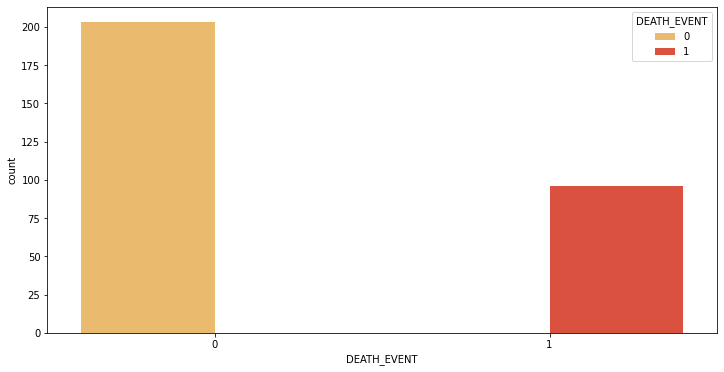

In [18]:
# Memeriksa distribusi target
num_heart_failure = len(df)
num_true = len(df.loc[df["DEATH_EVENT"] == 1])
num_false = len(df.loc[df["DEATH_EVENT"] == 0])
print("Jumlah pasien yang memiliki risiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(num_true, (num_true/num_heart_failure)*100))
print("Jumlah pasien yang tidak memiliki risiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(num_false, (num_false/num_heart_failure)*100))

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="DEATH_EVENT", hue="DEATH_EVENT", data=df, palette="YlOrRd")

## Distribusi umur pasien dengan risiko kematian

Rata-rata usia pasien adalah 60.83


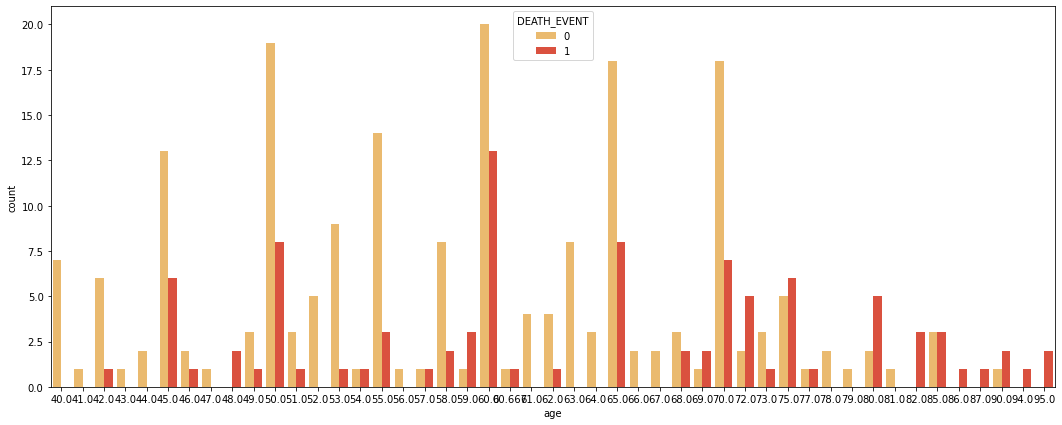

In [19]:
plt.figure(figsize=(18,7))
ax = sns.countplot(x="age", hue="DEATH_EVENT", data=df, palette="YlOrRd")

mean_de = df["age"].mean()
print("Rata-rata usia pasien adalah {:.2f}".format(mean_de))

Berdasarkan plot dapat kita simpulkan bahwa: 
1. Usia 60 tahun adalah usia yang memiliki risiko kematian akibat penyakit jantung tertinggi. 
2. Dapat dilihat juga bahwa umur pasien cenderung mempengaruhi ada tidaknya risiko kematian karena umur di bawah 45 tahun memiliki risiko kematian yang rendah
3. Umur di atas 50 tahun memiliki risiko kematian yang lebih tinggi.

Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian : 85
Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian: 167


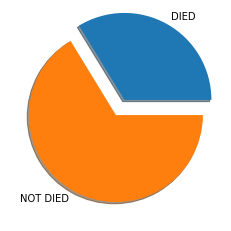

In [20]:
age_above_50_not_died = df['DEATH_EVENT'][df.age >=50][df.DEATH_EVENT == 0]
age_above_50_died = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian : {len_died}')
print(f'Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian: {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Dapat kita lihat bahwa berdasarkan *pie-chart* bahwa rasio antara pasien yang berumur di atas atau sama dengan 50 tahun yang memiliki risiko kematian dan yang tidak berisiko kematian memiliki perbandingan proporsi 1:2.

## Distribusi jenis kelamin pasien dengan risiko kematian

Jumlah pasien berjenis kelamin wanita: 105
Jumlah pasien berjenis kelamin pria: 194


Text(0.73, -0.15, 'Pria')

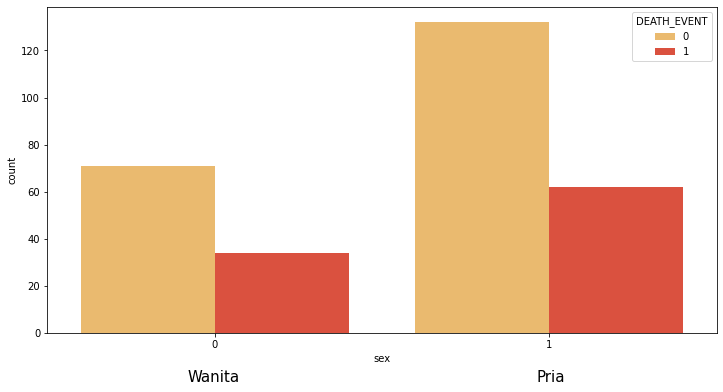

In [21]:
female = df['DEATH_EVENT'][df.sex == 0]
male = df['DEATH_EVENT'][df.sex == 1]

len_f = len(female)
len_m = len(male)

print(f'Jumlah pasien berjenis kelamin wanita: {len_f}')
print(f'Jumlah pasien berjenis kelamin pria: {len_m}')

plt.figure(figsize=(12, 6))
ax = sns.countplot(x="sex", hue="DEATH_EVENT", data=df, palette="YlOrRd")
plt.text(0.21, -0.15, 'Wanita', color='black', transform=ax.transAxes,fontsize=15)
plt.text(0.73, -0.15, 'Pria', color='black', transform=ax.transAxes,fontsize=15)

Berdasarkan plot dapat kita ketahui bahwa jumlah laki-laki (1) dengan resiko kematian akibat penyakit jantung cendering lebih banyak dibandingkan dengan wanita (0)

## Distribusi kolom `anemia`, `diabetes`, `high_blood_pressure`, `smoking`, dan `time` berdasarkan risiko kematian

<AxesSubplot:xlabel='time', ylabel='count'>

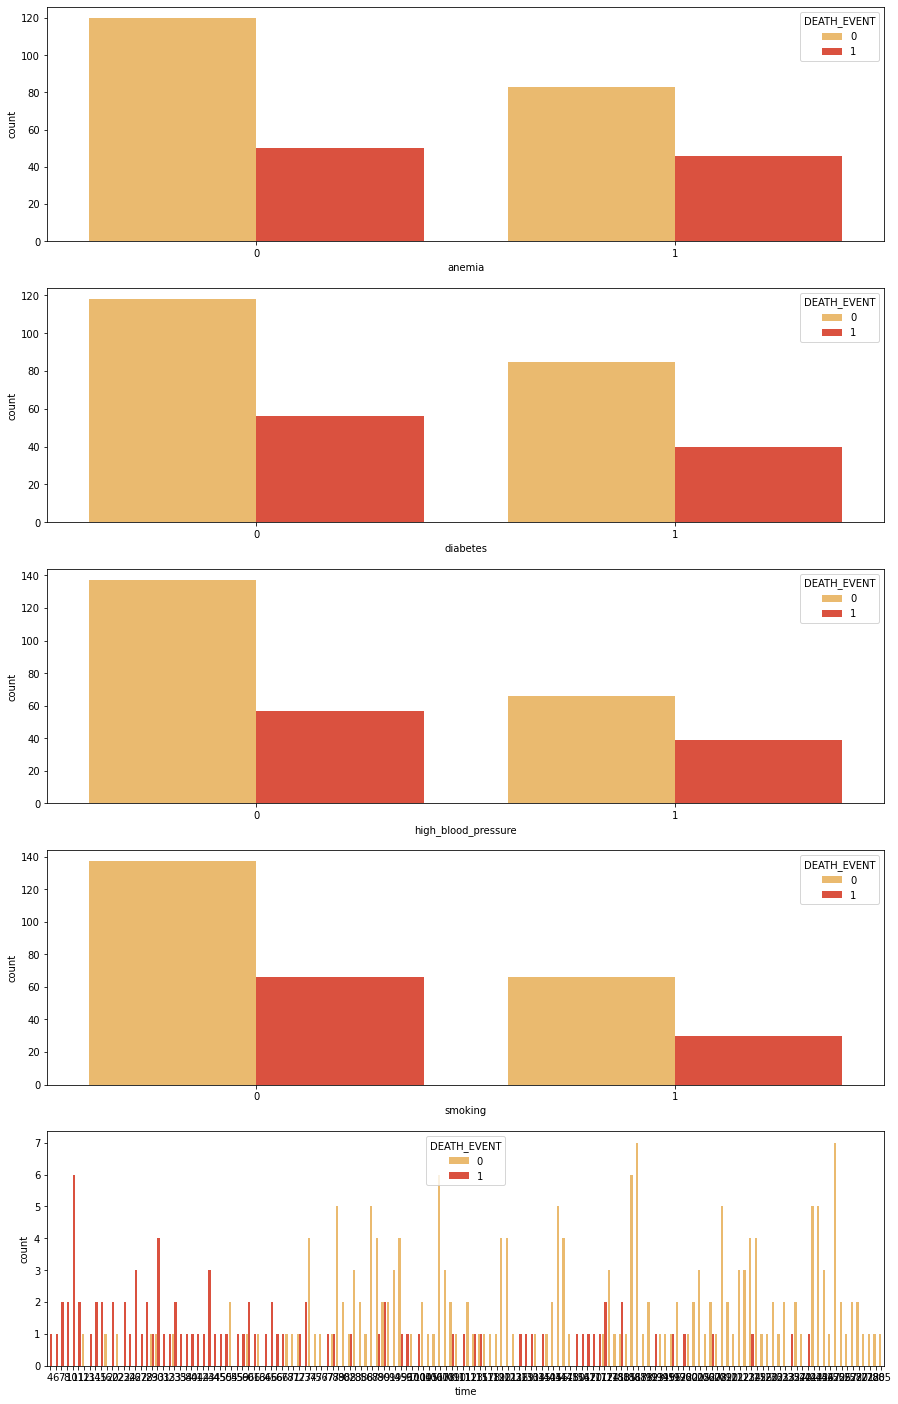

In [22]:
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(5,1,1)
ax1 = fig.add_subplot(5,1,2)
ax2 = fig.add_subplot(5,1,3)
ax3 = fig.add_subplot(5,1,4)
ax4 = fig.add_subplot(5,1,5)

sns.countplot(x="anemia", hue="DEATH_EVENT", data=df, palette="YlOrRd", ax=ax0)
sns.countplot(x="diabetes", hue="DEATH_EVENT", data=df, palette="YlOrRd", ax=ax1)
sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT", data=df, palette="YlOrRd", ax=ax2)
sns.countplot(x="smoking", hue="DEATH_EVENT", data=df, palette="YlOrRd", ax=ax3)
sns.countplot(x="time", hue="DEATH_EVENT", data=df, palette="YlOrRd", ax=ax4)

Berdasarkan plot daiatas, dapat kita ketahui bahwa 
1. Pada histogram diatas diketahui 0(kelas wanita) dan 1(kelas pria)
2. untuk kolom anemia, diabetes, darah tinggi, dan perokok tidak menunjukkan pengaruh yang signifikan terhadap resiko kematian akibat penyakit jantung. Namun pada kolom time, menunjukkan bahwa semakin sedikit time (waktu follow-up pasien), maka risiko kematian akibat penyakit jantung semakin tinggi pula dikarenakan kurangnya kontrol terhadap kondisi pasien. 

# Data Preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pelatihan model prediksi klasifikasi.

In [23]:
data = df.copy()

In [24]:
#Memisahkan/memecah data
age = data["age"]
ejection_fraction = data["ejection_fraction"]
time = data["time"]

Visualisasi nilai statistik masing-masing kolom numerik menggunakan boxplot.

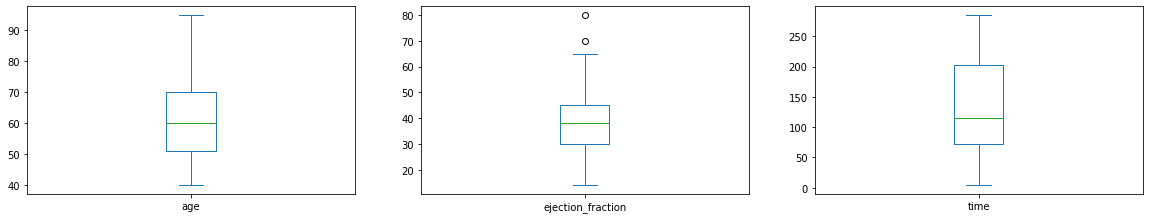

In [25]:
fig = plt.figure(figsize=(20,20))

ax0 = fig.add_subplot(5,3,1)
ax1 = fig.add_subplot(5,3,2)
ax2 = fig.add_subplot(5,3,3)

age.plot(kind="box", ax=ax0)
ejection_fraction.plot(kind="box", ax=ax1)
time.plot(kind="box", ax=ax2)
plt.show()

Berdasarkan boxplot diatas dapat kita lihat bahwa pada kolom <b>ejection_fraction</b> masih terdapat outlier pada data, maka sebelum memasuki proses selanjutnya perlu kita lakukan standarisasi data.

## Standarisasi data

Standarisasi data dilakukan untuk mengubah data sedemikian sehingga *mean* tiap variabel menjadi sama dengan nol, dan *standard deviation* tiap variabel adalah satu. Dengan begitu, akan didapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena banyaknya *outlier* atau pecilan pada data.

<b> Rumus mencari standarisasi data: (value dalam kolom tertentu - mean dalam kolom tertentu) / standar deviasi dalam kolom tertentu

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(data.drop('DEATH_EVENT',axis = 1))
scaled_features = scaler.transform(data.drop('DEATH_EVENT',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,age,anemia,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,-0.847579,-1.530560,1.359272,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,-0.847579,-0.007077,-0.735688,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.847579,-1.530560,-0.735688,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.847579,-1.530560,-0.735688,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,1.179830,-1.530560,-0.735688,-4.682176,-1.359272,-0.687682,-1.577879


## Splitting dataset

Membagi data *training* dan *testing* dengan rasio 80:20

In [28]:
X = df_feat
y = data["DEATH_EVENT"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 69.90%
Test set sebesar 30.10%


In [31]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 209
Jumlah testing set: 90


In [32]:
print("Jumlah pasien berisiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(len(df.loc[df["DEATH_EVENT"] == 1]), (len(df.loc[df["DEATH_EVENT"]==1])/len(df.index))*100.0))
print("Jumlah pasien yang tidak berisiko kematian akibat penyakit Jantung: {0} ({1:2.2f}%)\n".format(len(df.loc[df["DEATH_EVENT"] == 0]), (len(df.loc[df["DEATH_EVENT"] == 0])/len(df.index))*100.0))

print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Jumlah pasien berisiko kematian akibat penyakit jantung: 96 (32.11%)
Jumlah pasien yang tidak berisiko kematian akibat penyakit Jantung: 203 (67.89%)

Training True: 68 (32.54%)
Training False: 141 (67.46%)

Testing True: 28 (31.11%)
Testing False: 62 (68.89%)


# Pendefinisian Model

## Logistic Regression

In [33]:
model_lr = LogisticRegression()
model_lr

LogisticRegression()

## K-Nearest Neighbors

In [34]:
model_knn = KNeighborsClassifier()

## Support Vector Machine

In [35]:
model_svm = SVC()
model_svm

SVC()

## Decision Tree

In [36]:
model_tree = DecisionTreeClassifier()
model_tree

DecisionTreeClassifier()

## Random Forest

In [37]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf

RandomForestClassifier(n_estimators=200)

## Naive Bayes

In [38]:
model_nb = GaussianNB()
model_nb

GaussianNB()

# Pelatihan Model

## Logistic Regression

In [39]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

## K-Nearest Neighbors

In [40]:
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

## Support Vector Machine

In [41]:
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

## Decision Tree

In [42]:
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

## Random Forest

In [43]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

## Naive Bayes

In [44]:
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# Evaluasi Model

Evaluasi model dengan matriks yang tepat juga dapat membantu dalam mengatasi imbalanced data yang ada pada dataset ini.

## Logistic Regression

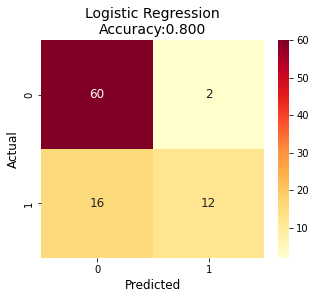

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87        62
           1       0.86      0.43      0.57        28

    accuracy                           0.80        90
   macro avg       0.82      0.70      0.72        90
weighted avg       0.81      0.80      0.78        90

Accuracy Score:- 0.8
Precision Score:- 0.8571428571428571
Recall Score:- 0.42857142857142855
F1 Score: 0.5714285714285714


In [45]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="YlOrRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

## K-Nearest Neighbors

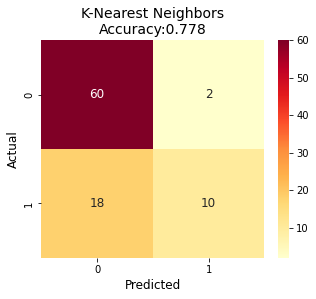

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        62
           1       0.83      0.36      0.50        28

    accuracy                           0.78        90
   macro avg       0.80      0.66      0.68        90
weighted avg       0.79      0.78      0.75        90

Accuracy Score:- 0.7777777777777778
Precision Score:- 0.8333333333333334
Recall Score:- 0.35714285714285715
F1 Score: 0.5


In [46]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="YlOrRd", annot_kws={"fontsize":12})
plt.title("K-Nearest Neighbors\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_knn)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_knn)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_knn)}')
print("F1 Score:",f1_score(y_test,y_pred_knn))

## Support Vector Machine

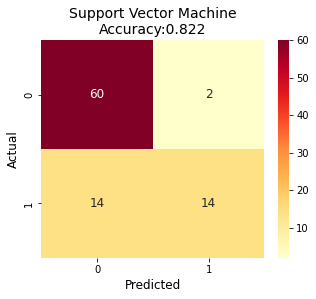

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        62
           1       0.88      0.50      0.64        28

    accuracy                           0.82        90
   macro avg       0.84      0.73      0.76        90
weighted avg       0.83      0.82      0.81        90

Accuracy Score:- 0.8222222222222222
Precision Score:- 0.875
Recall Score:- 0.5
F1 Score: 0.6363636363636364


In [47]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="YlOrRd", annot_kws={"fontsize":12})
plt.title("Support Vector Machine\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

## Decision Tree

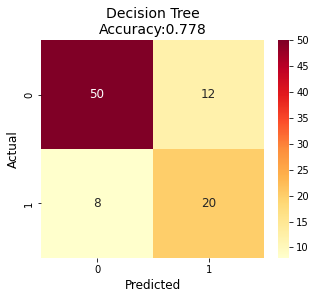

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        62
           1       0.62      0.71      0.67        28

    accuracy                           0.78        90
   macro avg       0.74      0.76      0.75        90
weighted avg       0.79      0.78      0.78        90

Accuracy Score:- 0.7777777777777778
Precision Score:- 0.625
Recall Score:- 0.7142857142857143
F1 Score: 0.6666666666666666


In [48]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="YlOrRd", annot_kws={"fontsize":12})
plt.title("Decision Tree\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_tree)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_tree)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_tree)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_tree)}')
print("F1 Score:",f1_score(y_test,y_pred_tree))

## Random Forest

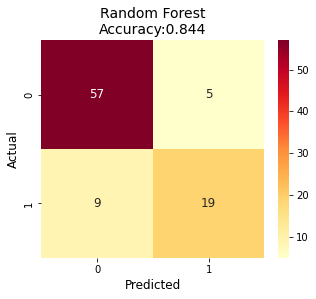

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        62
           1       0.79      0.68      0.73        28

    accuracy                           0.84        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90

Accuracy Score:- 0.8444444444444444
Precision Score:- 0.7916666666666666
Recall Score:- 0.6785714285714286
F1 Score: 0.7307692307692307


In [49]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="YlOrRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_rf)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf)}')
print("F1 Score:",f1_score(y_test,y_pred_rf))

## Naive Bayes

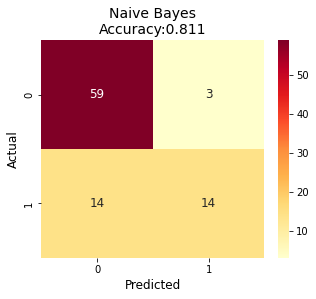

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87        62
           1       0.82      0.50      0.62        28

    accuracy                           0.81        90
   macro avg       0.82      0.73      0.75        90
weighted avg       0.81      0.81      0.80        90

Accuracy Score:- 0.8111111111111111
Precision Score:- 0.8235294117647058
Recall Score:- 0.5
F1 Score: 0.6222222222222222


In [50]:
# Create a confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="YlOrRd", annot_kws={"fontsize":12})
plt.title("Naive Bayes\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_nb)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_nb)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_nb)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_nb)}')
print("F1 Score:",f1_score(y_test,y_pred_nb))

Dari model yang berhasil kita buat pada macam-macam algoritma klasifikasi, dapat kita lihat pada nilai F1 score dari klasifikasi Random Forest memiliki nilai yang paling besar, yaitu sebesar 0.720000. Hal ini berarti model klasifikasi random forest lah yang paling baik dalam mempredikisi resiko kematian sesorang yang diakibatkan oleh penyakit jantung.Algoritma Random Forest memiliki nilai akurasi sebesar 84%, nilai precision sebesar 0.82, recall sebesar 0.64, dan f1-score sebesar 0.72.

<b> Jadi alasan menggunakan random forest adalah karena random forest merupakan hasil penghitungan decision tree beberapa kali (200, 300, 400, 500, dst) sehingga membentuk sebuah forest (hutan kecil) dan secara tidak langsung juga sudah termasuk ensemble karena terdiri atas beberapa decision tree. Dengan menggunakan teknik ini maka semakin banyak prediksi yang dilakukan sehingga dapat meningkatkan rata-rata dan juga tingkat akurasi dari prediksi model, selain itu juga teknik ini bisa meminimumkan bias (error) nya. Satu atau dua hasil prediksi yang salah memang buruk, namun jika hanya ada 2 prediksi salah dari 500 prediksi, maka ia tidak akan menganggu nilai rataannya. Semakin banyak prediksi, semakin baik hasil akurasi dan stabilitasnya, walaupun juga akan memakan waktu lebih banyak untuk komputasinya. 

<b> Selain itu dengan menggunakan random forest juga fapat membantu kita dalam mengatasi nilai varians yang tinggi, dan juga dapat mengatasi model yang cenderung overfit. Dengan adanya jenis pohon yang acak atau berbeda dapat mencegah korelasi antara tree jika tiap tree mirip satu sama yang lain. </b>

***Sumber:***
    
https://www.megabagus.id/machine-learning-random-forest-regression/#:~:text=Jadi%20alasan%20mengapa%20disebut%20random,average)%20dari%20sekian%20banyak%20prediksi

# Feature Importance

Setelah mendapatkan model prediksi klasifikasi terbaik, akan dicek *feature Importance* dari data yaitu mengetahui fitur/kolom mana saja yang paling berpengaruh untuk menentukan prediksi target.

In [51]:
data2 = data.copy()
data2.drop("DEATH_EVENT", axis=1, inplace=True)
feature_names = list(data2.columns.values)

In [52]:
feature_imp = pd.Series(model_rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

time                   0.427454
ejection_fraction      0.182739
age                    0.157081
serum_sodium           0.117972
anemia                 0.029430
sex                    0.022608
high_blood_pressure    0.022290
diabetes               0.020413
smoking                0.020014
dtype: float64

Pada algoritma RandomForestClassifier, terdapat perhitungan untuk mengukur feature importances. Dapat dilihat bahwa 1 variabel yang memiliki nilai *feature Importance* paling tinggi yaitu `time`, lalu diikuti oleh `ejection_fraction`, dan `age`.

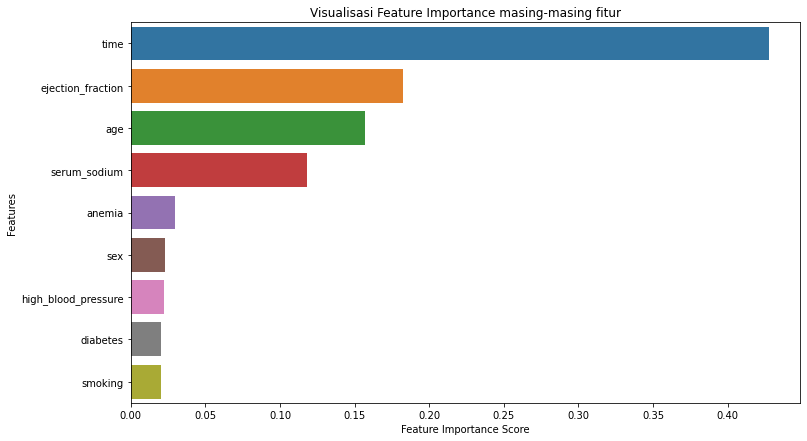

In [53]:
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualisasi Feature Importance masing-masing fitur")

plt.show()

Berdasarkan plot dari feature importance diatas dapat kita ketahui bahwa <b>high blood pressure, diabetes</b>, dan <b>smoking</b> memiliki nilai feature importance terkecil sehingga variabel tersebut kita hapus karena tidak berpengaruh terhadap model prediksi ataupun bahkan menurunkan akurasi dari model prediksi.

#### Menghapus beberapa data yang memiliki score yang kecil diantara data lainnya dan berpengaruh terhadap akurasi model yaitu high blood pressure, diabetes, smoking.

In [54]:
data2 = data2.drop(['smoking','high_blood_pressure','diabetes'], axis=1)
data2

,age,anemia,ejection_fraction,serum_sodium,sex,time
0,75.0,0,20,130,1,4
1,55.0,0,38,136,1,6
2,65.0,0,20,129,1,7
3,50.0,1,20,137,1,7
4,65.0,1,20,116,0,8
...,...,...,...,...,...,...
294,62.0,0,38,143,1,270
295,55.0,0,38,139,0,271
296,45.0,0,60,138,0,278
297,45.0,0,38,140,1,280


In [55]:
scaler_ = StandardScaler()
scaled_features_ = scaler_.fit_transform(data2)
df_feat_ = pd.DataFrame(scaled_features_, columns = data2.columns)
df_feat_.head()

,age,anemia,ejection_fraction,serum_sodium,sex,time
0,1.192945,-0.871105,-1.530560,-1.504036,0.735688,-1.629502
1,-0.491279,-0.871105,-0.007077,-0.141976,0.735688,-1.603691
2,0.350833,-0.871105,-1.530560,-1.731046,0.735688,-1.590785
3,-0.912335,1.147968,-1.530560,0.085034,0.735688,-1.590785
4,0.350833,1.147968,-1.530560,-4.682176,-1.359272,-1.577879


In [56]:
X_ = df_feat_
y_ = data["DEATH_EVENT"]

In [57]:
# Membagi data testing dan data training
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=0)

In [58]:
# Pendefinisan model
model_rf_2 = RandomForestClassifier(n_estimators=100, random_state=0)

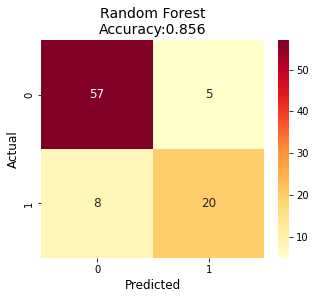

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        62
           1       0.80      0.71      0.75        28

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90

Accuracy Score:- 0.8555555555555555
Precision Score:- 0.8
Recall Score:- 0.7142857142857143
F1 Score: 0.7547169811320756


In [59]:
# Melatih data
model_rf_2.fit(X_train_, y_train_)
y_pred_rf_ = model_rf_2.predict(X_test_)

# Confusion Matrix
cm = confusion_matrix(y_test_, y_pred_rf_)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="YlOrRd", annot_kws={"fontsize":12})
plt.title("Random Forest\nAccuracy:{:.3f}".format(accuracy_score(y_test_, y_pred_rf_)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()
print("Classification Report:\n", classification_report(y_test_, y_pred_rf_))

print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf_)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf_)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf_)}')
print("F1 Score:",f1_score(y_test,y_pred_rf_))

Berdasarkan *output*, dapat kita ketahui bahwa algoritma terbaik adalah Random Forest dan setelah dilakukan pengecekan *feature importance* dengan nilai akurasi sebesar 0.85, precision sebesar 0.8, recall sebesar 0.71, dan f1-score sebesar 0.75. 

# Model Inference

In [60]:
X_.head()

,age,anemia,ejection_fraction,serum_sodium,sex,time
0,1.192945,-0.871105,-1.530560,-1.504036,0.735688,-1.629502
1,-0.491279,-0.871105,-0.007077,-0.141976,0.735688,-1.603691
2,0.350833,-0.871105,-1.530560,-1.731046,0.735688,-1.590785
3,-0.912335,1.147968,-1.530560,0.085034,0.735688,-1.590785
4,0.350833,1.147968,-1.530560,-4.682176,-1.359272,-1.577879


Untuk menguji keakuratan model, dilakukan *model inference* untuk menguji model dengan data di luar data yang tersedia.

<b> Contoh Kasus: </b>

1. Terdapat pasien yang berumur 58 tahun. Setelah dilakukan pemeriksaan, didapat hasil pemeriksaan sebagai berikut:
- Pasien tidak memiliki riwayat anemia
- Persentase darah yang keluar dari jantung setiap kontraksi (*ejection fraction*) sebesar 40 %
- Level serum sodium sebesar 130 mEq/L
- pasien berjenis kelamin wanita

Pasien telah menjalani kontrol untuk *follow up* kondisi selama 10 hari. Apakah pasien memiliki risiko kematian akibat penyakit jantung?

In [61]:
age = int(input("Age:"))
anemia = int(input("Anemia:"))
e_f = float(input("Ejection Fraction Percentage:"))
s_sodium = float(input("Sodium Level:"))
sex = int(input("Sex:"))
time = int(input("Follow up control: "))

val = [age,anemia, e_f,s_sodium,sex,time]
val = scaler_.transform([val])

print('Input values:', val)

val_predict = model_rf_2.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:58
Anemia:0
Ejection Fraction Percentage:40
Sodium Level:130
Sex:0
Follow up control: 10
Input values: [[-0.2386456  -0.87110478  0.16219911 -1.50403612 -1.35927151 -1.55206738]]

Pasien memiliki risiko kematian akibat penyakit jantung


<b> Contoh Kasus: </b>

2. Terdapat pasien yang berumur 15 tahun. Setelah dilakukan pemeriksaan, didapat hasil pemeriksaan sebagai berikut:
- Pasien tidak memiliki riwayat anemia
- Persentase darah yang keluar dari jantung setiap kontraksi (*ejection fraction*) sebesar 80 %
- Level serum sodium sebesar 300 mEq/L
- pasien berjenis kelamin wanita

Pasien telah menjalani kontrol untuk *follow up* kondisi selama 50 hari. Apakah pasien memiliki risiko kematian akibat penyakit jantung?

In [62]:
age = int(input("Age:"))
anemia = int(input("Anemia:"))
e_f = float(input("Ejection Fraction Percentage:"))
s_sodium = float(input("Sodium Level:"))
sex = int(input("Sex:"))
time = int(input("Follow up control: "))

val = [age,anemia, e_f,s_sodium,sex,time]
val = scaler_.transform([val])

print('Input values:', val)

val_predict = model_rf_2.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:15
Anemia:0
Ejection Fraction Percentage:80
Sodium Level:300
Sex:0
Follow up control: 50
Input values: [[-3.85972829 -0.87110478  3.5477164  37.08766306 -1.35927151 -1.03583383]]

Pasien tidak memiliki risiko kematian akibat penyakit jantung


# Kesimpulan


Berdasarkan keselruhan analisis yang sudah dilakukan, maka dapat disimpulkan bahwa:
1. Project ini berisikan tentang penerapan materi Supervised Machine Learning yaitu dengan motode Classification. Terdapat beberapa algoritma dalam metode classification yang digunakan pada project kali ini, diantaranya Logistic Regression, K-Nearest Neighbors, Support Vector Machine (SVM), Decision Tree, dan Naive Bayes. Tujuan dilaksanakannnya proyek ini yaitu adalah ensemble atau mencari model prediksi klasifikasi terbaik dari beberapa algoritma diatas yang digunakan di dalam prediksi. Data yang digunakan dalam project ini adalah data dokumentasi kondisi pasien penderita penyakit Kardiovaskular. Dataset ini terdiri dari 299 baris dan 13 kolom dan kolom DEATH_EVENT akan menjadi variabel dependent atau target untuk prediksi ini. Jadi, pada proyek kali ini kita akan memprediksi apakah seorang pasien tersebut diperkirakan akan menerima risiko kematian akibat gagal jantung/penyakit Kardiovaskular atau tidak berdasarkan pada fitur yang ada pada dataset.
2. Umur pasien yang tercatat dalam data yang memiliki frekuensi tertinggi yaitu sekitar umur 55 - 65 tahun.
3. Berdasarkan visulasisasi dataset, diketahui bahwa usia 60 tahun adalah usia yang memiliki risiko kematian akibat penyakit jantung tertinggi, umur di atas 50 tahun memiliki risiko kematian yang lebih tinggi dan Umur di bawah 45 tahun memiliki risiko kematian yang rendah. Hal ini menunjukkan bahwa umur pasien cenderung mempengaruhi ada tidaknya risiko kematian
4. Pada data, rasio antara pasien yang berumur di atas atau sama dengan 50 tahun yang memiliki risiko kematian dan yang tidak berisiko kematian memiliki perbandingan proporsi 1:2.
5. Jumlah laki-laki (1) dengan resiko kematian akibat penyakit jantung cendering lebih banyak dibandingkan dengan wanita (0)
6. Berdasarkan hasil analisis diketahui bahwa model klasifikasi yang terbaik adalah random forest karena memiliki nilai F1-score yang paling tinggi, selain itu penggunaaan random forest juga dikarenakan bahwa random forest sudah memenuhi sifat ensemble dimana random forest sendiri merupakan kumpulan dari beberapa decision tree, sehingga memungkinkan adanya nilai rata-rata dan juga tingkat akurasi prediksi yang lebih baik karena merupakan kumpulan dari beberapa *tree* yang berbeda.
7. Diantara semua kolom atau fitur yang ada, berdasarkan pengecekan feature importance diketahui bahwa kolom yang paling berpengaruh adalah <b>time</b> yang berarti waktu *follow-up* pasian delam hitungan hari  memberikan pengaruh paling sgnifikan dalam menentukan risiko kematian sesorang akibat penyakit jantung. Dimana semakin tinggi jumlah waktu *follow-up* pasien, maka semakin rendah risiko kematian akibat gagal jantung begitupun sebaliknya.
8. Berdasarkan plot pada *feature importance* dapat kita ketahui bahwa high blood pressure, diabetes, dan smoking memiliki nilai *feature importance* terkecil sehingga variabel tersebut dihapus karena tidak berpengaruh terhadap model prediksi ataupun bahkan menurunkan akurasi dari model prediksi.
9. Setelah dilakukan pengecekan *feature importance* maka kita lakukan lagi evaluasi model dan didapatkan bahwa terjadi kenaikan pada tingkat akurasi sebesar 0.85, precision sebesar 0.8, recall sebesar 0.71, dan f1-score sebesar 0.75. 

# Save and Load Models

Pada tahap menyimpan serta membaca data ke dalam/dari sebuah file dapat digunakannya sebuah modul pickle.

In [63]:
pickle_file_dir = open("rf_model2.pkl", "wb")

pickle.dump(model_rf_2, pickle_file_dir)
pickle_file_dir.close()

In [64]:
pickle_file_read = open("rf_model2.pkl", "rb")
classifier = pickle.load(pickle_file_read)

In [65]:
classifier.predict(X_test_)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [66]:
pickle.dump(scaler_, open(r'C:\Users\RIDHO\pythn\final-project-3 (1)\models\scaler_.pkl','wb'))
scaler_ = pickle.load(open(r'C:\Users\RIDHO\pythn\final-project-3 (1)\models\scaler_.pkl','rb'))